Importing Necessary libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize  #tokenize is used to split the words input- string output- a list of words

In [ ]:
!pip install nltk

Importing stopwords from nltk library

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
newsgroups=fetch_20newsgroups()

In [ ]:
newsgroups.target_names  #here the target names are our categories of documents

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#Storing stopwords of english language
stop_words=set(stopwords.words('english'))

In [ ]:
# we do not require punctuations also,so we add them to stop_words
punc=list(string.punctuation)

In [ ]:
stop_words.update(punc)   #and update them with the list of stop_words

In [ ]:
#There is a chance of extra stopwords other than this,so we add them also by observing documents of each categories.
new_stop_words = ['x','y','your','yours''yourself','yourselves','you','yond','yonder','yon','ye','yet','z','zillion','usually','us','username',
'upon','up','unto','until','unless','unlike','more''most','other','some','such','no','nor','not','only','own','same','so','from',
'than','what','for','about','miss','any','over','his','her','with','did','something','someone','else','that','why','when','where','this','into',
'every','one','are','therefore','then'
'too','onto','will','how','able','the','just','never','because','out','should','would','could','can',
'very','high','come','initial','anything','from','first','enough','were','their','might','make','have',
'has','had','was','most','without','the','who','thought','either','also','three','thus'
'otherwise','ourselves','anyone','overall','accordingly','among','already','available','beyond','lovely',
'may','notice','well','like','now','two','maybe','not','being','give','which'

]


In [ ]:
#Updating initial stopwords with added ones
stop_words.update(new_stop_words)

In [ ]:
len(stop_words)

271

In [ ]:
len(newsgroups.data)

11314

In [ ]:
set(newsgroups.target)   #category numbers for newsgroups

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [ ]:
set(newsgroups.target_names)

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [ ]:
all_docs=newsgroups.data #storing data of documents in all_docs
all_categories=newsgroups.target #Storing categories in all_categories

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
split_docs=[word_tokenize(doc) for doc in all_docs]   #word_tockenize is used to split the words in a document

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(split_docs,all_categories,random_state=42)

In [ ]:
#Creation of Vocabulary of words

In [ ]:
all_words=[]

for doc in xtrain:
  for word in doc:
    if(word.lower() not in stop_words and len(word)!=1 and len(word)!=2 and word[0]!="'" and word[0]!='.' and word!="n't"):
      all_words.append(word)

In [ ]:
len(all_words)

1335326

In [ ]:
#Creating a dictionary with the vocabulary with keys as words and values as frequency

In [ ]:
def freq(all_words):
  dic={}

  for word in all_words:
    if word in dic:
      dic[word]+=1
    else:
      dic[word]=1
  return dic

dic=freq(all_words)

In [ ]:
len(dic)

170986

In [ ]:
#to plot the values of a dictionary,we need to get them to separate variables....so splitting them up

In [ ]:
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])

In [ ]:
words=words[np.argsort(freq)][::-1]  #Sorting words in terms of decreasing frequency
freq=np.sort(freq)[::-1]

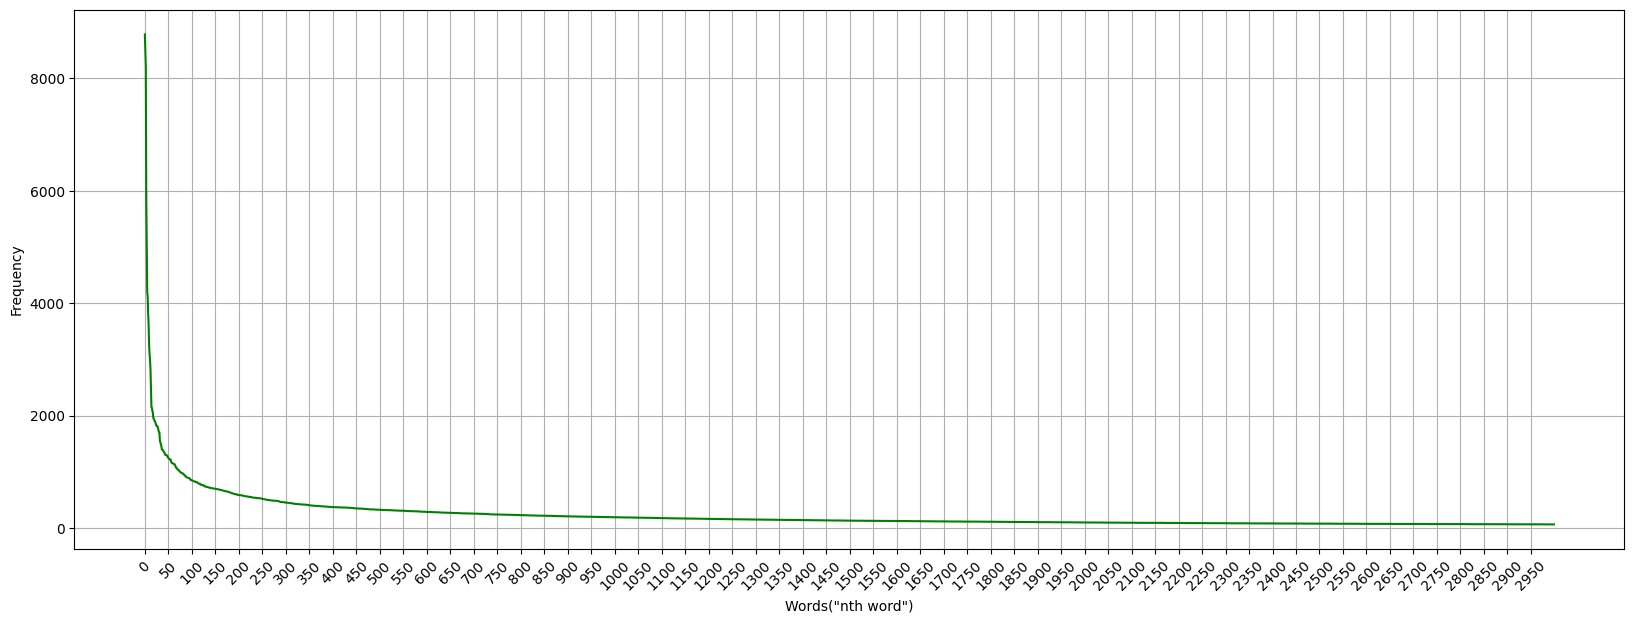

In [77]:
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick=50
#adjusting size of the graph for more clarity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit],'g')
#labelling
plt.xlabel('Words("nth word")')
plt.ylabel("Frequency")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()

In [ ]:
len(words)

170986

In [ ]:
features=words[20:1000]

In [ ]:
len(features)

9980

In [ ]:
freq[20],freq[10000]

(1923, 17)

In [ ]:
len(xtrain)

8485

Making a 2D Array of docs as rows and features as columns - here features are words

In [36]:
def table(data,features):
  table=np.zeros((len(data),len(features)))   #makes a table of features and rows of 0s initially
  for i in range(len(data)):
    current_doc=data[i]
    d=dict()
    for word in current_doc:
      if word in d.keys():
        d[word]+=1
      else:
        d[word]=1

    for j in range(len(features)):
      if features[j] in d.keys():
        table[i][j]=d[features[j]]  #filling the row with frequency
      else:
        continue
  return table



In [37]:
xtrain_table=table(xtrain,features)

In [44]:
xtest_table=table(xtest,features)

In [38]:
xtrain_table.shape

(8485, 9980)

Implementation of inbuilt Multinomial Naive Byes Classifier


In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
model1=MultinomialNB()

In [42]:
model1.fit(xtrain_table,ytrain)

MultinomialNB()

In [43]:
model1.score(xtrain_table,ytrain)

0.9403653506187389

In [45]:
model1.score(xtest_table,ytest)

0.8617886178861789

In [69]:
y_prediction=model1.predict(xtest_table)

In [74]:
for i in confusion_matrix(ytest, y_prediction):
    for j in i:
        print(j, end="  ")
    print()

109  0  0  0  0  0  0  0  2  0  0  0  0  0  1  0  1  0  1  3  
0  117  3  4  0  9  3  0  1  0  0  0  0  0  1  0  0  0  0  0  
0  17  75  33  3  7  6  0  0  0  0  1  0  0  0  0  0  0  0  0  
0  8  1  110  10  1  6  0  0  0  0  2  6  0  0  0  0  1  0  0  
0  1  0  8  137  0  9  0  0  0  0  0  2  0  0  0  0  0  0  0  
0  15  0  2  2  113  0  0  2  0  0  0  1  1  0  0  0  0  0  0  
0  0  0  6  5  0  113  6  3  0  0  0  2  0  2  0  0  0  0  0  
0  0  0  3  0  0  4  149  5  0  0  0  3  0  0  0  0  0  0  0  
0  2  0  0  1  0  3  6  141  1  0  0  0  0  0  0  0  0  0  1  
0  0  0  0  1  0  1  1  0  134  2  0  1  0  0  1  0  0  0  0  
0  0  0  0  1  1  1  0  1  3  129  0  0  0  0  0  0  0  0  0  
0  1  0  1  0  1  0  0  0  1  0  142  0  1  0  0  2  0  7  0  
0  5  0  9  4  1  4  2  0  1  0  1  115  0  2  0  0  0  0  0  
1  1  0  0  1  1  0  0  1  0  0  0  1  134  4  1  0  0  0  0  
0  4  0  0  0  1  0  0  2  0  0  0  1  1  141  1  1  0  0  0  
3  1  0  0  0  1  3  0  1  0  0  0  0  0  1  130  1 

In [73]:
print(classification_report(ytest,y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       117
           1       0.67      0.85      0.75       138
           2       0.95      0.53      0.68       142
           3       0.61      0.76      0.68       145
           4       0.82      0.87      0.85       157
           5       0.83      0.83      0.83       136
           6       0.73      0.82      0.77       137
           7       0.89      0.91      0.90       164
           8       0.88      0.91      0.89       155
           9       0.95      0.95      0.95       141
          10       0.98      0.95      0.97       136
          11       0.97      0.91      0.94       156
          12       0.87      0.80      0.83       144
          13       0.97      0.92      0.95       145
          14       0.90      0.93      0.92       152
          15       0.90      0.87      0.88       150
          16       0.92      0.93      0.93       150
          17       0.95    

Building Own Naive_Bayes Classifier

In [46]:
#fit function - returns a dictionary with keys as categories and values as another dictionary which has keys as features and values as frequency

def fit(x_train,y_train):
  results={}
  for i in range(30):
    category_docs=x_train[y_train==i]   # contains only the rows with category i
    results[i]=dict()   #another dictionary with keys - features and values - frequency
    results[i]['total']=0   # total words of category i

    for j in range(len(features)):
      results[i][features[j]]=category_docs[:,j].sum()
      results[i]['total']+=results[i][features[j]]

  return results


In [48]:
#Returns the probability of words in each class
def probability(results,doc,k):
  proba_for_word=[]
  for i in range(len(doc)):
    if doc[i]!=0:  #not considering the features with 0 frequency
      numerator=results[k][features[i]]
      denominator=results[k]['total']
      proba=np.log((numerator+1)/(denominator+len(doc)))
      proba_for_word.append(proba)

  return sum(proba_for_word)

In [57]:
#Predicts the category of documents
def predict_singledoc(results,doc):
  category=results.keys()
  best_probability=-1000
  best_class=-1
  first_run=True
  for k in category:
    proba_k =probability(results,doc,k)

    if (first_run or proba_k>best_probability):
      best_probability=proba_k
      best_class=k
    first_run=False
  return best_class

In [50]:
def predict(x_test,results):
  y_pred=[]  #an array of predicted category values
  for doc in x_test:
    y_pred.append(predict_singledoc(results,doc))
  return y_pred

In [51]:
results=fit(xtrain_table,ytrain)


In [58]:
y_pred=predict(xtest_table,results)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [67]:
for i in confusion_matrix(ytest, y_pred):
    for j in i:
        print(j, end="  ")
    print()

108  0  0  0  0  0  0  0  2  0  0  1  0  0  0  1  1  0  1  3  
0  118  4  7  0  6  1  0  0  0  0  0  0  0  1  0  0  0  1  0  
0  18  76  34  5  8  0  0  0  0  0  1  0  0  0  0  0  0  0  0  
0  8  0  122  6  0  3  0  0  0  0  1  4  0  0  0  1  0  0  0  
0  1  0  17  130  0  5  0  0  0  0  0  4  0  0  0  0  0  0  0  
0  19  0  2  3  109  0  1  2  0  0  0  0  0  0  0  0  0  0  0  
0  2  0  10  5  0  104  9  3  0  0  1  3  0  0  0  0  0  0  0  
0  3  0  2  0  0  4  149  2  0  0  0  4  0  0  0  0  0  0  0  
0  3  0  1  0  0  1  8  135  1  0  1  0  0  1  1  2  0  0  1  
0  0  0  0  1  0  2  1  0  134  1  0  1  0  0  1  0  0  0  0  
0  0  0  0  1  1  1  0  2  1  128  0  0  0  0  0  0  0  1  1  
0  1  0  2  0  0  0  0  0  0  0  148  0  0  0  0  4  0  1  0  
0  5  0  10  5  1  2  3  0  1  0  2  113  0  1  0  1  0  0  0  
0  2  0  0  1  1  0  1  1  0  0  2  2  131  2  2  0  0  0  0  
0  5  0  0  1  2  0  0  1  0  0  1  0  2  136  1  0  0  3  0  
1  1  0  1  1  1  2  0  0  0  0  0  0  0  0  136  

In [59]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       117
           1       0.63      0.86      0.73       138
           2       0.95      0.54      0.68       142
           3       0.57      0.84      0.68       145
           4       0.81      0.83      0.82       157
           5       0.84      0.80      0.82       136
           6       0.82      0.76      0.79       137
           7       0.84      0.91      0.87       164
           8       0.90      0.87      0.89       155
           9       0.97      0.95      0.96       141
          10       0.99      0.94      0.97       136
          11       0.93      0.95      0.94       156
          12       0.86      0.78      0.82       144
          13       0.98      0.90      0.94       145
          14       0.94      0.89      0.92       152
          15       0.87      0.91      0.89       150
          16       0.89      0.93      0.91       150
          17       0.95    

Comparison between the two Implementations

Both inbuilt and own implementation gave almost similar accuracies of around
0.86 which is pretty good and can be improved by adding some more features...but it may increase the complexity.....Although the precision is almost consistent for all classes,the recall varied significantly from medium to high.